# Assignment 1.1 - AI in Education

In the first assignment, we will explore using clustering techniques and perform a regression and a classification task to predict the third-term grades of students in two portuguese schools using a set of features collected through questionnaires and the two first term features. 

The dataset is taken from P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7. More details can be found at https://www.kaggle.com/larsen0966/student-performance-data-set. 

The dataset consists of 639 samples (students) and 33 features (demographics, school-related features,...). A full description of the features can be found at https://archive.ics.uci.edu/ml/datasets/Student+Performance. 

This assignment is a mix of theoretical and practical questions. Keep in mind that we expect brief answers in the analysis questions. A suggested length is indicated next to the analysis questions. 

First, let's download all necessary modules. You can add the modules you wish to use as well.

In [1]:
# general
import numpy as np
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# model evaluation
from sklearn.model_selection import train_test_split

# Non-linear
from sklearn.preprocessing import PolynomialFeatures

# IMPORTANT: please use this constant as a seed everywhere for reproducibility
import random

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

### Here any module you wish to download

In [2]:
from zipfile import ZipFile
import io
from urllib.request import urlopen

URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"
r = urlopen(URL).read()
zip_file = ZipFile(io.BytesIO(r))
students_port = pd.read_csv(zip_file.open('student-por.csv'), delimiter=";")

Let's now verify we have all the information we need. You should obtain a dataset with 649 students and 33 features.

In [3]:
print("This dataset consists of {} students with {} associated features".format(students_port.shape[0],students_port.shape[1]))

This dataset consists of 649 students with 33 associated features


## Part 1: Exploratory analysis (7 questions)

First we will explore our dataset and its features. 

In [4]:
# feature breakdown
demographics = ["school","sex","age","address"]
family = ["famsize","Pstatus","Medu","Fedu","Mjob","Fjob","guardian","famrel"]
school_performance = ["failures","absences","G1","G2","G3"]
school_exterior = ["traveltime","studytime","schoolsup","famsup","paid","nursery","internet"]
other = ["activities","higher","romantic","freetime","goout","Dalc","Walc","health"]

We will start with visualizing the distribution of demographics in the dataset.

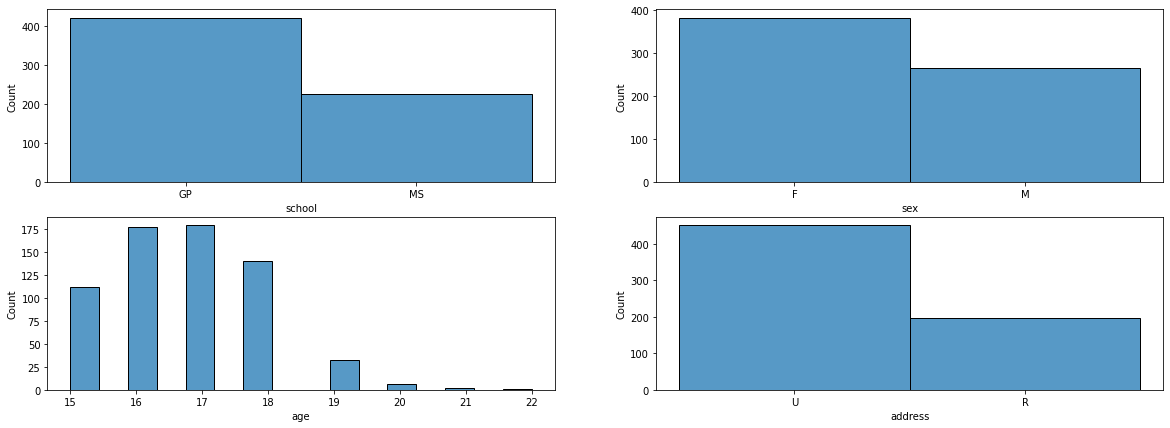

In [5]:
fig, ax = plt.subplots(2,2,figsize=(20,7))
flatax = ax.flatten()
for i,feature in enumerate(demographics):
    sns.histplot(students_port[feature],ax=flatax[i])

**Q1.1**: What are the demographics of the dataset? (1-2 sentences)

**A1.1**: There are around 400 students from Gabriel Pereira, 200 students from Mousinho da Silveira. Nearly 400 of them are female, 250 of them are male. The age is mostly from 15 to 18, and the address or mostly from urban. 

We will now visualize the family situation of the students.

(0.0, 1.0, 0.0, 1.0)

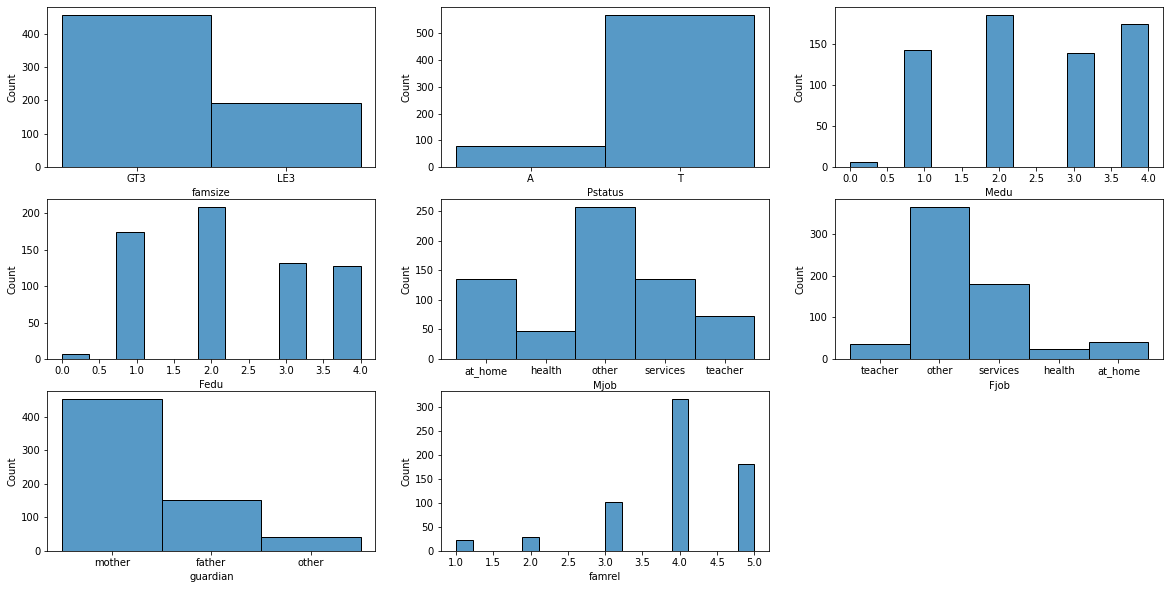

In [6]:
fig, ax = plt.subplots(3,3,figsize=(20,10))
flatax = ax.flatten()
for i,feature in enumerate(family):
    sns.histplot(students_port[feature],ax=flatax[i])
flatax[-1].axis('off')

In [7]:
students_port['Medu'].mean()

2.514637904468413

In [8]:
students_port['Fedu'].mean()

2.3066255778120186

In [9]:
students_port['famrel'].mean()

3.930662557781202

**Q1.2**: Describe the average family of a student in these schools. (2 sentences)

**A1.2**: The average family of student has more than 3 members, mother as the students' guardian, with parents living together, and quality of family relationships very good (4). The average education of parents is between primary education (5th to 9th grade) and secondary education. 

We now observe how the students perform at school.

(0.0, 1.0, 0.0, 1.0)

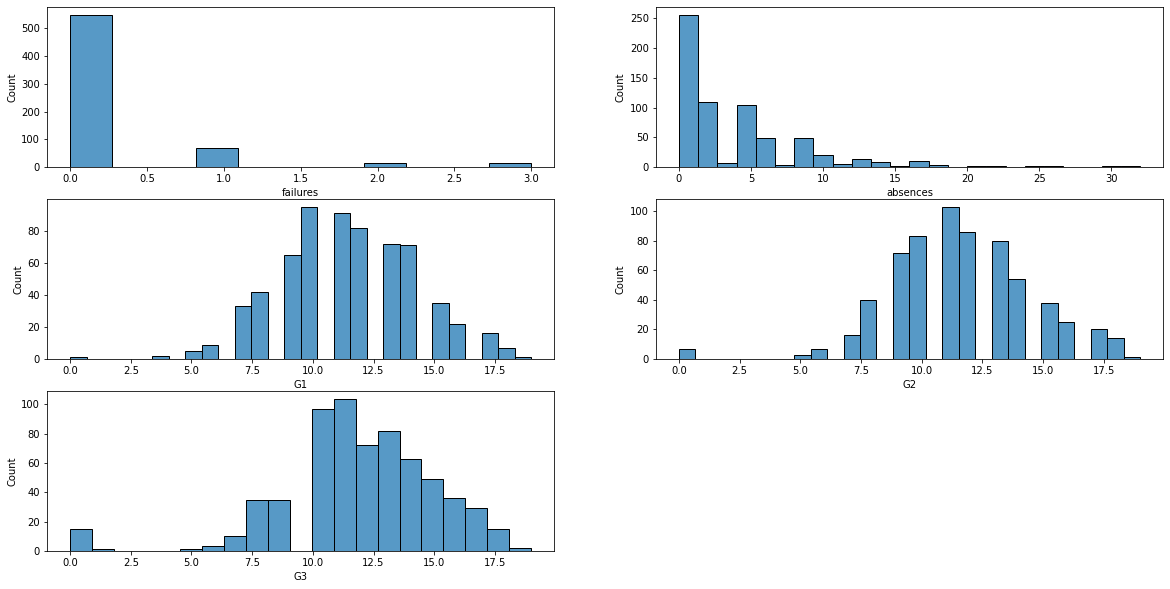

In [10]:
fig, ax = plt.subplots(3,2,figsize=(20,10))
flatax = ax.flatten()
for i,feature in enumerate(school_performance):
    sns.histplot(students_port[feature],ax=flatax[i])
flatax[-1].axis('off')

**Q1.3**: What proportion of students failed the first semester? second semester? third semester? (a student fails when their grade is under 10).

How does this proportion evolve? (hint: you can verify in `student_port` the number of students with a grade under 10 to have exact numbers) 

In [11]:
# Your code here
print( 'First semester: '+ str(100 * (students_port['G1'].to_numpy() < 10).sum() / students_port['G1'].to_numpy().shape[0]) + '%')
print( 'Second semester: '+ str(100 * (students_port['G2'].to_numpy() < 10).sum() / students_port['G1'].to_numpy().shape[0]) + '%')
print( 'Third semester: '+ str(100 * (students_port['G3'].to_numpy() < 10).sum() / students_port['G1'].to_numpy().shape[0]) + '%')

First semester: 24.19106317411402%
Second semester: 22.34206471494607%
Third semester: 15.408320493066256%


**A1.3**: There are 24.19% students failed the first semester, 22.34% students failed the second semester, and 15.41% students failed the third semester. The proportion is decreasing. 

**Q1.4**: What proportion of students that failed previous classes failed at least a semester?

In [12]:
from pandas.core.arrays.sparse.array import printing
# Your code here
prev_failures_mask = students_port['failures'].to_numpy() > 0
prev_failures = students_port[prev_failures_mask]
sem_failures_mask = np.logical_or(prev_failures['G3'].to_numpy() < 10, np.logical_or(prev_failures['G1'].to_numpy() < 10, prev_failures['G2'].to_numpy() < 10))
print(sem_failures_mask.sum() / sem_failures_mask.shape[0])

0.8


**A1.4**: There are 80% students that failed previous classes failed at least a semester. 

We explore school-related features that do not pertain directly to performance.

(0.0, 1.0, 0.0, 1.0)

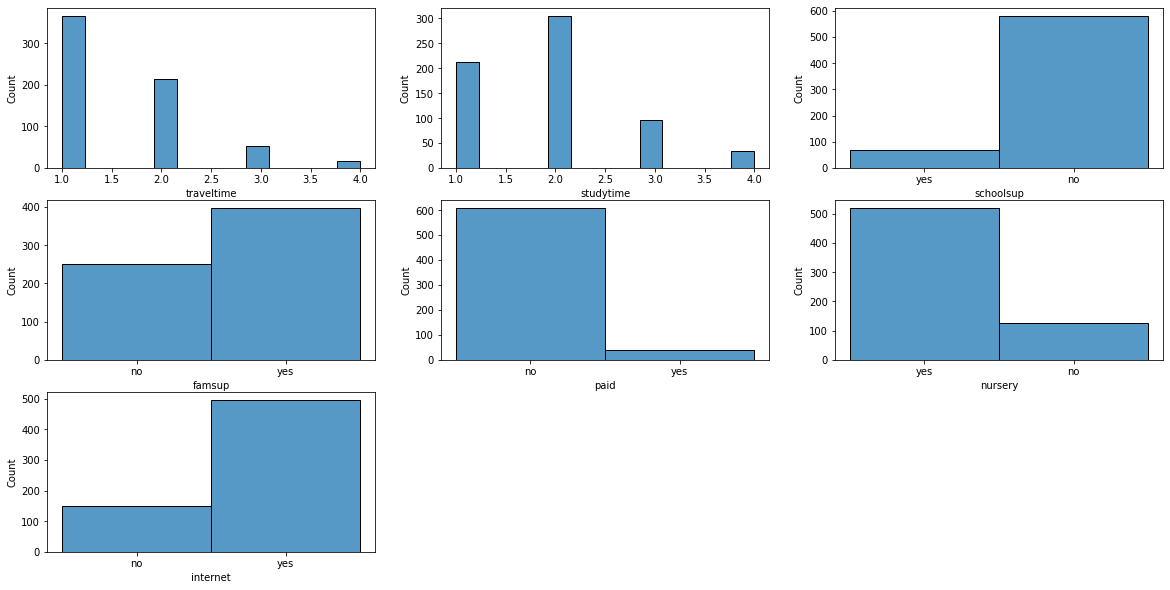

In [13]:
fig, ax = plt.subplots(3,3,figsize=(20,10))
flatax = ax.flatten()
for i,feature in enumerate(school_exterior):
    sns.histplot(students_port[feature],ax=flatax[i])
flatax[-1].axis('off')
flatax[-2].axis('off')

**Q1.5**: What (approximate) proportion of students receive extra school support? family support? paid tutoring? 
How much time does the majority of students spend travelling to school? Studying? (3-4 sentences)

In [14]:
(students_port['schoolsup'] == 'yes').sum() / students_port.shape[0]

0.10477657935285054

In [15]:
(students_port['famsup'] == 'yes').sum() / students_port.shape[0]

0.613251155624037

In [16]:
(students_port['paid'] == 'yes').sum() / students_port.shape[0]

0.060092449922958396

**A1.5**: 10.48% students receive extra school support, 61.33% students receive family support, 6.01% students have extra paid tutoring. Most of students spend less than 15 minutes travelling to school, and 2-5 hours studying. 

Finally we explore features related to extra-curricular activities, motivation and health. 

(0.0, 1.0, 0.0, 1.0)

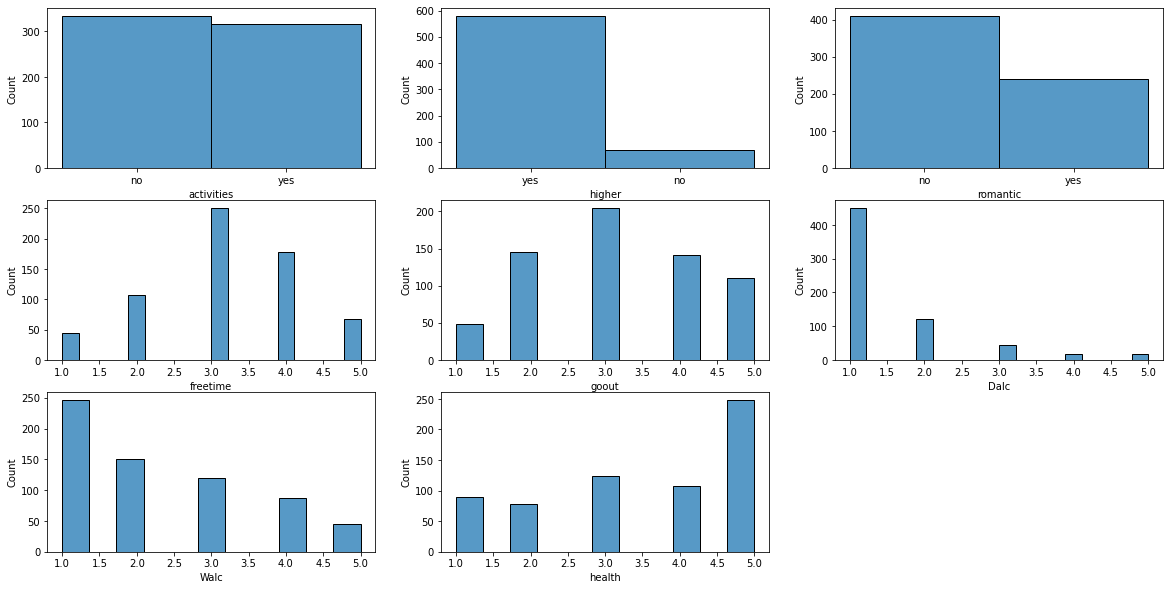

In [17]:
fig, ax = plt.subplots(3,3,figsize=(20,10))
flatax = ax.flatten()
for i,feature in enumerate(other):
    sns.histplot(students_port[feature],ax=flatax[i])
flatax[-1].axis('off')

**Q1.6**: Describe the average student of these schools (do they want to pursue higher education? do they often go out? consume alcohol? etc). (3-4 sentences)

**A1.6**: On average the students have medium level of free time and go out with a medium frequency. Most students have low alchohol consumption, and good health condition. Most students want to pursue higher education and one-third of the students are with a relationship.

**Q1.7**: How would you analyze this dataset further to find relationships between the studying predictor variables? (3-4 sentences) 

**A1.7**: I would firstly plot the scatter graph between the variables to ovserve the relationship. Then we can calculate the correlation and pearson correlation between different pair of features to find out which features are highly correlated. I would keep the features that are correlated with the value to be predicated, and remove reduant features. 

## Part 2: Regression (10 questions)

In [18]:
X = students_port.drop("G3",axis=1)
y = students_port[["G3"]]

We will now try to predict the grade for the third semester (G3) using the transformed features.

**Q2.1**: Transform the features before using regression. (1 sentence) 

Store the transformed dataframe as `X_transformed`. 

(*hint*: you have numerical variables, ordinal variables and categorical variables, how should you treat them?) 

(*hint 2*: when should you perfom scaling?)

In [19]:
# Your code here
from sklearn.preprocessing import LabelEncoder, StandardScaler
X_num_col = X._get_numeric_data().columns.tolist()
X_cat_col = set(X.columns) - set(X_num_col)
# one-hot encoding
lb = LabelEncoder()
X_transformed = X.copy()
for col_name in X_cat_col:
  X_transformed[col_name] = lb.fit_transform(X[col_name])

In [20]:
# scaling
scaler = StandardScaler()
X_transformed_np = scaler.fit_transform(X_transformed.to_numpy())
X_transformed = pd.DataFrame(X_transformed_np, columns = X_transformed.columns)

We will now try to predict the grade for the third semester (G3) using the transformed features.

We will start with some theoretical questions.

**Q2.2**: High dimensional feature space increases computational requirements (run-time complexity of the machine learning algorithm that handles the feature-space), at the expense of 
1. increasing error at training time - True/False
2. increasing error at test time - True/False

Briefly justify your reasoning (1 sentence).

**A2.2**: 
1. True
2. False
* High dimensional feature increases the time of convergence of the optimization algorithm (such as gradient descent) during training. 
Therefore, the increase of training error due to the high dimensional feature space cause the increase of computation. However, the error is only computed for one time during testing, thus the test error does not require much more computation. 

**Q2.3**: Regularization is crucial to 
1. reduce variance of a machine learning model without leading to a substantial increase in bias, but only until a certain limit, after which bias increases rapidly - True/False
2. reduce bias of a machine learning algorithm without leading to a substantial increase in variance, but only until a certain limit, after which variance increases rapidly - True/False

Briefly justify your reasoning (1 sentence).

**A2.3**: Your answer here
1. True
2. False
* The bias implies how well the model fit the given dataset, while the variance implies how well the model can be generalized to unknown data. Regularization add a term to the original loss, which makes it more generalized, therefore, bias is increased, while variance is decreased. 

**Q2.4**: How would you build a model that exemplifies the condition where bias dominates (high bias, low variance)? Is this solution optimal? Why or why not? (3 sentences)

**A2.4**: 
* If we consider a simple model (linear regression or stump (only one decision in a decision tree)), which has high bias (too simple, not accurate) and low variance (can be easily generalized).
* This solution is not optimal because the decision boundary is too simple to capture detailed information. 


**Q2.5**: How would you build a model that exemplifies the condition where variance dominates (high variance, low bias)? Is this solution optimal? Why or why not? (3 sentences)

**A2.5**: 
* If we consider complex models (deep neural network without regularization or dropout), which has low bias (only two layers of neural network can approximate any functions) and high variance (especially when the data is simple, the network will overfit the data). 

* This solution is not optimal because it cannot be generalized to other data, since the decision boundary is tailored for the training data. 

We will know move on to practical questions.

As seen in class, it is important to keep a test set to evaluate the generalization of our models. We will thus use a $90\%/10\%$ train/test split for the regression model evaluation.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed,y,test_size=0.1,random_state=42)

**Q2.6**: Briefly describe what methods can be used to predict the G3 grade and what the main differences between the methods are. 
Which method would I use to be the most interpretable possible? (4-5 sentences)

**A2.6**: We can use methods such as linear regression, ridge regression, gaussian process to predict the G3 grade.
* Linear regression is the most interpretable method, which simply minimize the MSE loss by projecting the ground truth vector y into the column space of the feature matrix X. 

* Ridge regression add a regularization term to reduce the variance and make the model work better of general case. 

* Gaussian process output a distribution of the predicted G3 grade ($M_y, \Sigma_y$) given the ground truth.

* Neural network use multilayer of linearity followed by non-linearity (activation function) to make the model more complex to handle complex data. 

**Q2.7**: Train a Linear Regression model on the training data. How many features are used by the model? What three features have the highest coefficient? What are the Mean Squared Error (MSE) and $R^2$ on the test set? What do you think of the goodness of fit of the model? (1 sentence)

In [22]:
# Your code here
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
reg = LinearRegression().fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

train_MSE = mean_squared_error(y_train, y_train_pred)
train_r_2 = r2_score(y_train, y_train_pred)

test_MSE = mean_squared_error(y_test, y_test_pred)
test_r_2 = r2_score(y_test, y_test_pred)

coef = reg.coef_
coef_abs = np.abs(coef)
print("Features: " + str(X_train.shape[1]))
print(X.columns.to_numpy()[np.argsort(-coef)[0, :3]])
print(X.columns.to_numpy()[np.argsort(-coef_abs)[0, :3]])
print('Train MSE: ' + str(train_MSE))
print('Train R2: ' + str(train_r_2))
print('Test MSE: ' + str(test_MSE))
print('Test R2: ' + str(test_r_2))

Features: 32
['G2' 'G1' 'traveltime']
['G2' 'G1' 'failures']
Train MSE: 1.5748036070091371
Train R2: 0.8506160583188033
Test MSE: 0.6470539241672262
Test R2: 0.9236666435023586


**A2.7**: 32 features are used, the G2, G1, failures have the highest three absolute coefficients (G2, G1, traveltime if we do not use absolute coefficient), the test MSE is 0.647, and $R^2$ is 0.924. The model fits the data set well since the MSE of training is much lower than the scale of the G3 grade.

**Q2.8**: Using 10-fold cross-validation, train the best possible Ridge regression model to predict G3. What are the three parameters with the highest coefficients? What are the MSE and $R^2$ on the test set? What regularization parameter is chosen?

In [23]:
# Your code here
from sklearn.linear_model import RidgeCV
ridge_reg = RidgeCV(alphas=[1e-2, 1e-1, 7,8,9, 10, 11, 12, 13, 15], cv=10).fit(X_train, y_train)

In [24]:
coef = ridge_reg.coef_
coef_abs = np.abs(ridge_reg.coef_)

y_test_pred = ridge_reg.predict(X_test)

test_MSE = mean_squared_error(y_test, y_test_pred)
test_r_2 = r2_score(y_test, y_test_pred)

print(X.columns.to_numpy()[np.argsort(-coef)[0, :3]])
print(X.columns.to_numpy()[np.argsort(-coef_abs)[0, :3]])
print('Test MSE: ' + str(test_MSE))
print('Test R2: ' + str(test_r_2))
print(ridge_reg.alpha_)

['G2' 'G1' 'traveltime']
['G2' 'G1' 'failures']
Test MSE: 0.6518215031373991
Test R2: 0.9231042092266848
10.0


**A2.8**: The G2, G1, failures have the highest three absolute coefficients (G2, G1, traveltime if we do not use absolute coefficient), the test MSE is 0.652, and $R^2$ is 0.923. The regularization parameter chosen is 10.0.

**Q2.9**: Using 10-fold cross-validation, train the best possible Lasso regression model to predict G3. What are the MSE and $R^2$ on the test set? What regularization parameter is chosen? 

How many features are used by the model? What features does the model use? Can you explain this behavior? (1 sentence)

In [25]:
# Your code here
from sklearn.linear_model import LassoCV
lasso_reg = LassoCV(alphas=[1e-2, 1e-1, 7, 8, 9, 10, 11, 12, 13, 15], cv=10).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
y_test_pred = lasso_reg.predict(X_test)

test_MSE = mean_squared_error(y_test, y_test_pred)
test_r_2 = r2_score(y_test, y_test_pred)

print('Test MSE: ' + str(test_MSE))
print('Test R2: ' + str(test_r_2))
print(lasso_reg.alpha_)


Test MSE: 0.5481814709541736
Test R2: 0.9353306887032617
0.1


In [27]:
feature_mask = np.abs(lasso_reg.coef_) > 0
features = feature_mask.sum()
print(features)
print(X.columns.to_numpy()[feature_mask])

8
['school' 'sex' 'Fjob' 'studytime' 'failures' 'Dalc' 'G1' 'G2']


**A2.9**: 
* The test MSE is 0.548, and $R^2$ is 0.935. The regularization parameter chosen is 0.1.
* 8 features ('school' 'sex' 'Fjob' 'studytime' 'failures' 'Dalc' 'G1' 'G2') are used by the model. 
* Lasso regression can select feature, because the level set of the MSE loss and the regulization norm are tangent to each other mostly on the coordinate axis.

We now remove the G1 and G2 features from the dataset.

In [28]:
X_train_hard = X_train.drop(["G2","G1"],axis=1)
X_test_hard = X_test.drop(["G2","G1"],axis=1)

**Q2.10**: Retrain a all your regression models. 
    
How many features are used? What are the MSE and $R^2$  on the test set? Which model performs the best according to the $R^2$  metric? How do you explain the drop in performance? (1-2 sentences)

What are the three most informative features of the Lasso regression? How do you interpret these features? Based on these features, what could you recommend to the teachers to help students achieve better grades? (2-3 sentences)

In [29]:
# Your code here
from sklearn.linear_model import Lasso, Ridge
lin_reg = LinearRegression().fit(X_train_hard, y_train)
ridge_reg = Ridge(alpha = 10).fit(X_train_hard, y_train)
lasso_reg = Lasso(alpha = 0.1).fit(X_train_hard, y_train)

y_test_pred_lin = lin_reg.predict(X_test_hard)
y_test_pred_ridge = ridge_reg.predict(X_test_hard)
y_test_pred_lasso = lasso_reg.predict(X_test_hard)

test_r_2 = r2_score(y_test, y_test_pred)
print("Features: " + str(X_train_hard.shape[1]))
print("Lasso features: " + str((np.abs(lasso_reg.coef_) > 0).sum()))
print('Test MSE linear: ' + str(mean_squared_error(y_test, y_test_pred_lin)))
print('Test MSE ridge: ' + str(mean_squared_error(y_test, y_test_pred_ridge)))
print('Test MSE lasso: ' + str(mean_squared_error(y_test, y_test_pred_lasso)))
print('Test R2 linear: ' + str(r2_score(y_test, y_test_pred_lin)))
print('Test R2 ridge: ' + str(r2_score(y_test, y_test_pred_ridge)))
print('Test R2 lasso: ' + str(r2_score(y_test, y_test_pred_lasso)))
print(X_train_hard.columns.to_numpy()[np.argsort(-abs(lasso_reg.coef_))[:3]])

Features: 30
Lasso features: 19
Test MSE linear: 7.800681102494242
Test MSE ridge: 7.73148142346218
Test MSE lasso: 7.766775614607525
Test R2 linear: 0.07974876701741862
Test R2 ridge: 0.08791229647267262
Test R2 lasso: 0.0837486186486629
['failures' 'school' 'higher']


**A2.10**: 
* 30 features are used (19 features for lasso). Ridge regression performs the best. The MSE and $R^2$ scores are:
  - Test MSE linear: 7.800681102494242
  - Test MSE ridge: 7.73148142346218
  - Test MSE lasso: 7.766775614607525
  - Test R2 linear: 0.07974876701741862
  - Test R2 ridge: 0.08791229647267262
  - Test R2 lasso: 0.0837486186486629
* , the performance is worse than previous (with G1, G2), because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades.

* ('failures' 'school' 'higher') are the most informative features. 
  * Past failures of classes can indicate the final grade, because if a student fail more course, it's more likely that he has a lower final grade.
  * Student's school can indicate the study environment of a student, thus it has big influence on the final grade.
  * If a student wants to take higher education, it is more likely he works harder and get good final grade. 

* I would recommend the teachers to spend more time on the students who failed previous classes, and encourage students to pursue higher education. Besides, different schools should learn from successful experience of each other. 

## Part 3: Classification (4 questions)

We will now try to predict a higher level feature, namely if the student passes or fails. In portugal, a student passes when their grade is above 10. 

**Q3.1**: Conceptually, what is the difference between classification and regression. What metrics can one use to evaluate the performance of the model? Briefly describe one of these metrics. (3-4 sentences)

**A3.1**: While regression predict the continuous values, classification predicts discrete class labels. We can use accuracy, AUC or F1 score to evalute the model. For example, F1 combines the precision() and recall of a classifier into a single metric by taking their harmonic mean.


**Q3.2**: Transform your target variable so that it fits a binary classification model (using Pass and Fail as the two options, remembering a student passes if their grade is over 10). Using the same train/test split as before and 10-fold cross validation, train the best possible Logistic Regression model with L1-regularization. Use ROC AUC to evaluate your model. 

What are the ROC AUC and F1 score on the test set? What is the chosen regularization parameter (rounded to the decimal)? 

In [30]:
# Your code here
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score, f1_score, auc
y_test_clf = y_test > 10
y_train_clf = y_train > 10

clf = LogisticRegressionCV(Cs = [1e-2, 1e-1, 0.3, 0.4, 0.5, 1, 2, 3],
                           cv=10, random_state=0, penalty = 'l1',
                           scoring = 'roc_auc', solver = 'liblinear').fit(X_train, y_train_clf)

y_test_pred_clf = clf.predict(X_test)
print("Test ROC AUC: " + str(roc_auc_score(y_test_pred_clf, y_test_clf)))
print("Test F1: " + str(f1_score(y_test_pred_clf, y_test_clf)))
print(clf.C_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test ROC AUC: 0.9175084175084175
Test F1: 0.9523809523809523
[0.1]


**A3.2**: The AUC on test set is 0.918, the F1 on test set is 0.952. The chosen regularization parameter is 0.1. 

**Q3.3**: Now use the `X_train_hard` and `X_test_hard` features to train the best possible Logistic Regression with L1-regularization in the same manner.  What are the ROC AUC and F1 scores on your test set? 

What are the 5 most important features for classification? How do you interpret these features? (1-2 sentences) 

In [31]:
# Your code here
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C = 1e-1,penalty = 'l1', solver = 'liblinear').fit(X_train_hard, y_train_clf)

y_test_pred_clf = clf.predict(X_test_hard)
print("Test ROC AUC: " + str(roc_auc_score(y_test_pred_clf, y_test_clf)))
print("Test F1: " + str(f1_score(y_test_pred_clf, y_test_clf)))


Test ROC AUC: 0.8454545454545455
Test F1: 0.9245283018867925


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
print(X_train_hard.columns.to_numpy()[np.argsort(-np.abs(clf.coef_))[0, :5]])

['failures' 'school' 'higher' 'Fedu' 'absences']


**A3.3**: The AUC on test set is 0.845, the F1 on test set is 0.925. The 5 most important features are ['failures', 'school', 'higher', 'Fedu', 'absences']. As explained in Q 2.10, failures, school, and whether the student wants to pursue higher education influences the final grade, thus influences the pass or fail status. Besides, father's education influences the pass status because the home environment can have an impact on learning. Also, number of school absences indicate the students' motivation to learn, thus influences the pass or fail status. 

**Q3.4**: Classify the 5 most important features of the model into the following categories: 
- student performance
- student motivation
- student socioeconomic background

Imagine this prediction model is used in the classroom. Taking into consideration the features most predictive of passing or failing, how can these predictions be used by the teachers to help failing students? (2-3 sentences)

**A3.4**: 
- student performance: failures
- student motivation: higher, absences
- student socioeconomic background: school, Fedu

The teachers could give more aid to the students who fail previous courses. Teacher could encourage students to pursue higher education , stimulates students' interest in learning and prevent them from absence. Teachers could also improve the learning environment, and pay more attention to the students' family situation. 



## Part 4: Non-linear features and models (1 question)

The regression task becomes harder when G1 and G2 (very informative features) are removed. To try and curb this issue, we will perform feature engineering on the dataset to try to model non-linear interactions.

In [33]:
# we use a polynomial feature transformer (degree 2) that will model feature interactions and squared features
poly = PolynomialFeatures(2)
X_train_FE = pd.DataFrame(poly.fit_transform(X_train_hard),
                    columns = poly.get_feature_names(X_train_hard.columns),index=X_train_hard.index)
X_test_FE = pd.DataFrame(poly.fit_transform(X_test_hard),
                    columns = poly.get_feature_names(X_test_hard.columns),index=X_test_hard.index)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


**Q4.1**: Train a `RandomForestRegressor`from the `sklearn` package on the original transformed set `X_train_hard` and the engineered set `X_train_FE`. Use GridSearch to find the best possible model. 

What MSE and $R^2$  do you obtain for both these models? How would you explain the difference in performance?

How would you explain the difference between the performance of this model and the linear models?

What are the 10 most important features?

In [34]:
# Your code here
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters = {'n_estimators': [50, 75, 100, 150], 
              'min_samples_split': [15, 20, 25, 30],
              'min_samples_leaf' : [5, 7, 9, 13, 15]
              }
reg_hard = GridSearchCV(RandomForestRegressor(), parameters, cv=10, n_jobs=-1, verbose=1).fit(X_train_hard, y_train)
reg_hard.best_params_

Fitting 10 folds for each of 80 candidates, totalling 800 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'min_samples_leaf': 7, 'min_samples_split': 20, 'n_estimators': 50}

In [36]:
parameters = {'n_estimators': [10, 20, 50], 
              'min_samples_split': [2, 8, 10, 16, 20],
              'min_samples_leaf' : [2, 10, 20]
              }
reg_FE = GridSearchCV(RandomForestRegressor(), parameters, cv=10, n_jobs=-1, verbose=1).fit(X_train_FE, y_train)
reg_FE.best_params_

Fitting 10 folds for each of 45 candidates, totalling 450 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 50}

In [37]:
y_test_hard_pred = reg_hard.predict(X_test_hard)
y_test_FE_pred = reg_FE.predict(X_test_FE)

print('Test hard MSE: ' + str(mean_squared_error(y_test, y_test_hard_pred)))
print('Test hard R2: ' + str(r2_score(y_test, y_test_hard_pred)))
print('Test FE MSE: ' + str(mean_squared_error(y_test, y_test_FE_pred)))
print('Test FE R2: ' + str(r2_score(y_test, y_test_FE_pred)))

Test hard MSE: 7.080927335017776
Test hard R2: 0.16465856954123803
Test FE MSE: 7.2539622055193105
Test FE R2: 0.1442455375462366


In [39]:
# print(X_train_hard.columns.to_numpy()[np.argsort(-np.abs(clf.coef_))[0, :5]])
X_train_hard.columns.to_numpy()[np.argsort(-reg_hard.best_estimator_.feature_importances_)[:10]]

array(['failures', 'school', 'absences', 'Walc', 'higher', 'Fedu',
       'studytime', 'health', 'schoolsup', 'Dalc'], dtype=object)

In [40]:
# print(X_train_hard.columns.to_numpy()[np.argsort(-np.abs(clf.coef_))[0, :5]])
X_train_FE.columns.to_numpy()[np.argsort(-reg_FE.best_estimator_.feature_importances_)[:10]]

array(['failures^2', 'failures', 'school Walc', 'schoolsup higher',
       'school schoolsup', 'school Fedu', 'studytime schoolsup',
       'higher goout', 'Medu Dalc', 'failures schoolsup'], dtype=object)

**A4.1**: 
1. The MSE and  $R^2$  scores are:
  * Test hard MSE: 7.212882955739302
  * Test hard R2: 0.1490916823588947
  * Test FE MSE: 7.2231068254770285
  * Test FE R2: 0.14788556604566816
  * Since the random forest randomly select features for different decision trees, and ensembles the base models, the complexity of base model may not have big effect on the overall performance. Therefore, the difference between the two features is slight. 
2. The random forest uses multiple decision tree and esemble them to make prediction. Therefore, the bias and variance of the model is reduced compared with naive linear models.
3. The most important features are ['failures', 'school', 'absences', 'higher', 'Walc', 'studytime', 'Fedu', 'schoolsup', 'health', 'Dalc'] for hard and ['failures^2', 'failures', 'school Walc', 'schoolsup higher',
  'school schoolsup', 'school Fedu', 'studytime schoolsup',
  'higher goout', 'Medu Dalc', 'failures schoolsup'] for FE